In [1]:
import torch
from lavis.models import load_model_and_preprocess
import pandas as pd
import os
from PIL import Image
import logging
import argparse
from torch.utils.data import Dataset
from tqdm import tqdm
import torch.utils.data as data

/homes/yg007/ooc_detection/venv_py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from lavis.models import model_zoo
print(model_zoo)

In [3]:
# Logger
logger = logging.getLogger()
logging.basicConfig(
    level=os.environ.get("LOGLEVEL", "INFO"),
    format="[%(asctime)s]:[%(processName)-11s]" + "[%(levelname)-s]:[%(name)s] %(message)s",
)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# blip2 captioning
model, vis_processors, _ = load_model_and_preprocess(name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device)

Position interpolate from 16x16 to 26x26


Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.72s/it]
[2023-11-07 06:47:58,943]:[MainProcess][INFO]:[timm.models.hub] Downloading: "https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_caption_flant5xl.pth" to /homes/yg007/.cache/torch/hub/checkpoints/blip2_caption_flant5xl.pth

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.07G/4.07G [02:23<00:00, 30.5MB/s]
[2023-11-07 06:50:28,517]:[MainProcess][INFO]:[root] Missing keys ['t5_model.shared.weight', 't5_model.encoder.embed_tokens.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.q.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.k.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.v.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.o.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.relative_

[2023-11-07 06:50:28,518]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_caption_flant5xl.pth


In [4]:
# blip captioning
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)

[2023-11-06 08:03:18,641]:[MainProcess][INFO]:[root] Missing keys []
[2023-11-06 08:03:18,645]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP/blip_coco_caption_base.pth


In [3]:
val_feather_path = '../raw_data/val_completed_exist.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists
val_img_dir = '/import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids'

Generated caption:
['a fighter jet sits on top of a runway with fog in the background']
Original text:
The Rafale fighter jet would be taking part in the Air Force Day parade for the first time on October 8. The combat aircraft was officially inducted into the Indian Air Force on September 10 in #Ambala(Haryana).
#ConnectGujarat #BeyondJustNews https://t.co/LtMLbJGC3l
Input image:


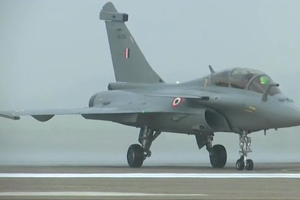

Falsified: False


In [55]:
item = val_df.iloc[16010]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(val_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
generated_text = model.generate({"image": image, "prompt": "Question: Could you describe the image in detail? Answer:"}, repetition_penalty=5.0, length_penalty=2.0)
# ['a large fountain spewing water into the air']
print(f"Generated caption:\n{generated_text}")
print(f"Original text:\n{text}")
print("Input image:")
display(raw_image.resize((300, 200)))
print(f"Falsified: {item['falsified']}")

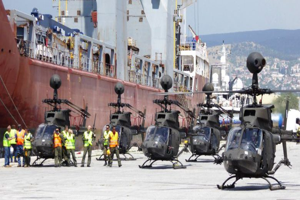

Original text:
Greece receives a total of 70 OH-58D Kiowa Warrior armed reconnaissance helicopters and 10 CH-47SD Chinook helicopters were bought from the US Army’s reserves. The unloading of the  begun on Wednesday at the port of Volos. 
https://t.co/nJY5gvvybZ https://t.co/JdovvgJ92v
Falsified: False


In [30]:
item = val_df.iloc[19247]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(val_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
display(raw_image.resize((300, 200)))
print(f"Original text:\n{text}")
print(f"Falsified: {item['falsified']}")